# Title: Wrangle project to gather, assess and clean data on tweets from We Rate Dogs tweeter page.

## Table of Contents
1. [Step 1: Gathering](#1)
2. [Step 2: Assessing](#2)
3. [Step 3: Cleaing Data](#3)
    1. [Addressing quality issues](#3.1)
    2. [Addressing tidyness issues](#3.2)  
4. [Step 4: Storing data](#4)
5. [Step 5: Analysing](#5a)
    1. [Insight 1](#5.1)
    2. [Insight 2](#5.2)
    3. [Insight 3](#5.3)
    4. [Addiional visualisation example](#5.4)
6. [Step 6: Reporting](#6)

# Step 1: Gathering
<a id = '1a'></a>

## Loading packages

In [1]:
import pandas as pd
import numpy as np

### 1.1 Reading twitter archive data
<a id = '1.1'></a>

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

### 1.2 Importing image prediction using requests package
<a id = '1.2'></a>

In [3]:
### requesting image prediction
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
name = url.split('/')[-1] ## Name of file
with open(name, mode = 'wb') as file:
        file.write(response.content)
df_2 = pd.read_csv(name, sep = '\t')

### 1.3 Loading additional data using TWEEPY API
<a id = '1.3'></a>
- Tweetter is not letting to sign up. Therefore, I am using udacity provided data set.

In [4]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

Reading the json data and creating a dataframe of tweet, retweet and favorite counts.

In [5]:
# creatign an empty list to store json information from every tweet
json_list = []
import json
with open('tweet_json.txt') as file:
    data = file.readlines()
for line in data:
    json_list.append(json.loads(line))

In [6]:
# selecting required columns from json list and creating a dataframe
df_json = []
for ind in np.arange(len(json_list)):
    id = json_list[ind]['id']
    retweet_count = json_list[ind]['retweet_count']
    favorite_count = json_list[ind]['favorite_count']
    df_json.append({'tweet_id': id,
                   'retweet_count': retweet_count,
                   'favorite_count': favorite_count})
df_3 = pd.DataFrame(df_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Step 2: Assessing

### To do:
- Using Visual and Programming method detect and document at least 
    - eight (8) quality issues
    - two (2) tidiness issues

First, I merge all three datasets into one and get copy of it. Analysing merged dataframe helps to work on the data at once.

In [7]:
df = df_1.merge(df_2, on = 'tweet_id', how = 'left')
df = df.merge(df_3, on = 'tweet_id', how = 'left')
df_clean = df.copy() # cleaning would be done on a copy of the original dataframe.

### 2.1 Visual Inspections

In [8]:
### Setting pandas option to view all rows at once by scrolling we neet to set the option to max row numbers.
pd.options.display.max_rows = df_clean.shape[0]
pd.options.display.min_rows = df_clean.shape[0]

In [9]:
df_clean.iloc[:,:10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

In [10]:
df_clean.iloc[:,10:20]

rating_numerator  rating_denominator            name  doggo  floofer  \
0                   13                  10         Phineas   None     None   
1                   13                  10           Tilly   None     None   
2                   12                  10          Archie   None     None   
3                   13                  10           Darla   None     None   
4                   12                  10        Franklin   None     None   
5                   13                  10            None   None     None   
6                   13                  10             Jax   None     None   
7                   13                  10            None   None     None   
8                   13                  10            Zoey   None     None   
9                   14                  10          Cassie  doggo     None   
10                  13                  10            Koda   None     None   
11                  13                  10           Bruno   None     None   
12                  13                  10            None   None     None   
13                  12                  10             Ted   None     None   
14                  13                  10          Stuart   None     None   
15                  13                  10          Oliver   None     None   
16                  12                  10             Jim   None     None   
17                  13                  10            Zeke   None     None   
18                  13                  10         Ralphus   None     None   
19                  13                  10          Canela   None     None   
20                  12                  10          Gerald   None     None   
21                  13                  10         Jeffrey   None     None   
22                  14                  10            such   None     None   
23                  13                  10          Canela   None     None   
24                  13                  10            None   None     None   
25                  12                  10            None   None     None   
26                  13                  10            Maya   None     None   
27                  13                  10          Mingus   None     None   
28                  13                  10           Derek   None     None   
29                  12                  10          Roscoe   None     None   
30                  12                  10            None   None     None   
31                  13                  10         Waffles   None     None   
32                  12                  10            None   None     None   
33                  12                  10           Jimbo   None     None   
34                  13                  10          Maisey   None     None   
35                  14                  10            None   None     None   
36                  13                  10           Lilly   None     None   
37                  13                  10            None   None     None   
38                  12                  10            Earl   None     None   
39                  13                  10            Lola   None     None   
40                  13                  10           Kevin   None     None   
41                  14                  10            None   None     None   
42                  13                  10            None   None     None   
43                  12                  10            Yogi  doggo     None   
44                  12                  10            Noah   None     None   
45                   5                  10           Bella   None     None   
46                  13                  10       Grizzwald   None  floofer   
47                  13                  10            None   None     None   
48                  13                  10           Rusty   None     None   
49                  12                  10             Gus   None     None   
50                  13      

In [10]:
df_clean.iloc[:, 20:]

p1_conf p1_dog                              p2       p2_conf p2_dog  \
0     0.097049  False                           bagel  8.585110e-02  False   
1     0.323581   True                        Pekinese  9.064650e-02   True   
2     0.716012   True                        malamute  7.825300e-02   True   
3     0.170278  False              Labrador_retriever  1.680860e-01   True   
4     0.555712   True                English_springer  2.257700e-01   True   
5     0.425595   True                   Irish_terrier  1.163170e-01   True   
6     0.341703   True                   Border_collie  1.992870e-01   True   
7     0.566142   True                      Eskimo_dog  1.784060e-01   True   
8     0.487574   True                    Irish_setter  1.930540e-01   True   
9     0.511319   True                        Cardigan  4.510380e-01   True   
10    0.957979   True                      Pomeranian  1.388350e-02   True   
11    0.377417   True              Labrador_retriever  1.513170e-01   True   
12    0.966327   True                        Cardigan  2.735570e-02   True   
13    0.991650   True                           boxer  2.128640e-03   True   
14    0.953442   True              Labrador_retriever  1.383410e-02   True   
15    0.626152   True                          borzoi  1.947420e-01   True   
16    0.714719   True                 Tibetan_mastiff  1.201840e-01   True   
17    0.469760   True              Labrador_retriever  1.841720e-01   True   
18    0.700377   True                      Eskimo_dog  1.665110e-01   True   
19    0.809197   True             Rhodesian_ridgeback  5.495000e-02   True   
20    0.995026   True                             pug  9.319080e-04   True   
21    0.821664   True                         redbone  8.758150e-02   True   
22    0.130432  False                       tow_truck  2.917540e-02  False   
23    0.809197   True             Rhodesian_ridgeback  5.495000e-02   True   
24    0.330741   True                        sea_lion  2.756450e-01  False   
25    0.733942   True                      Eskimo_dog  3.502950e-02   True   
26    0.793469   True                     toy_terrier  1.435280e-01   True   
27    0.309706   True                  Great_Pyrenees  1.861360e-01   True   
28    0.738995  False                      sports_car  1.399520e-01  False   
29    0.999201   True                       Chihuahua  3.611780e-04   True   
30         NaN    NaN                             NaN           NaN    NaN   
31    0.943575   True                      shower_cap  2.528560e-02  False   
32         NaN    NaN                             NaN           NaN    NaN   
33    0.972494   True                        Shih-Tzu  6.630120e-03   True   
34    0.369275   True              Labrador_retriever  2.658350e-01   True   
35         NaN    NaN                             NaN           NaN    NaN   
36    0.908703   True                       seat_belt  5.709090e-02  False   
37    0.812482   True                  Siberian_husky  7.171250e-02   True   
38    0.259916   True  American_Staffordshire_terrier  1.984510e-01   True   
39    0.822103   True                 Norwich_terrier  1.060750e-01   True   
40    0.546406   True                  French_bulldog  4.042910e-01   True   
41    0.993225   True                        Cardigan  3.216480e-03   True   
42         NaN    NaN                             NaN           NaN    NaN   
43    0.707046   True                        malinois  1.993960e-01   True   
44    0.610946   True              miniature_pinscher  2.996030e-01   True   
45    0.943082   True              Labrador_retriever  3.240900e-02   True   
46    0.987997   True                 Tibetan_mastiff  7.098720e-03   True   
47    0.949562   True              Labrador_retriever  4.594790e-02   True   
48    0.466778   True                  Siberian_husky  4.060440e-01   True   
49    0.850050   True        Chesapeake_Bay_retriever  7.425700e-02   True   
50    0.542982   True        

### 2.2 Assessing via programming

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_clean.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator      img_num      p1_conf       p2_conf  \
count         2356.000000  2075.000000  2075.000000  2.075000e+03   
mean            10.455433     1.203855     0.594548  1.345886e-01   
std              6.745237     0.561875     0.271174  1.006657e-01   
min              0.000000     1.000000     0.044333  1.011300e-08   
25%             10.000000     1.000000     0.364412  5.388625e-02   
50%             10.000000     1.000000     0.588230  1.181810e-01   
75%             10.000000     1.000000     0.843855  1.955655e-01   
max            170.000000     4.000000     1.000000  4.880140e-01   

            p3_conf  retweet_count  favorite_count  
count  2.075000e+03    2354.000000     2354.000000  
mean   6.032417e-02    3164.797366     8080.968564  
std    5.090593e-02    5284.770364    11814.771334  
min    1.740170e-10       0.000000        0.000000  
25%    1.622240e-02     624.500000     1415.000000  
50%    4.944380e-02    1473.500000     3603.500000  
75%    9.180755e-02    3652.000000    10122.250000  
max    2.734190e-01   79515.000000   132810.000000

### 2.3 Detected issues from assessment
### Quality issues

1. Many tweets are retweeted tweets. They are not original. 
2. Column name has erroneous names like 'such', 'life', 'light', 'by', 'all', 'my', 'an', 'O', 'just'.
3. Column name has name as 'None'. It should be replaced with 'NaN', since it can be confused as actual name.
4. Incorrect / mispelled dog names: 'Billl', 'Paull' and 'Karll
5. p1, p2 and p3 are not uniform. It needs to be set to uniform case (lower or upper).
6. p1, p2 and p3 have some words with '_'. It needs to be removed.
7. Ratings are not uniform. The outlier rating numarators should be normalized to denominator of 10 to be comparable.
8. Text column contains urls to the original tweet. Text columns should contain only user provided text.

### Tidiness issues

9. Columns ['doggo', 'floofer', 'pupper', 'puppo'] have values as 'None'. 'None' should be replaced to 'NaN' and these columns can be stacked into on as 'dog_stage'. 
10. Column 'timestamp' is not time format. It should be converted to timestamp type.
11. Column 'tweet_id' column needs to be converted from a number to string value
12. There are 181 rows with no images. Observation without images should be removed.

# Step 3: Cleaning Data

### 3.1 Define: 
Drop rows which are retweeted. If column retweet_status_id is not empty, it means that the tweet is a retweeted.

### Code

In [13]:
# Number of tweets which are done in reply to some tweet status or user id.
mask = (df_clean.retweeted_status_id.isnull() == True) 
df_clean = df_clean[mask].reset_index()

### Test

In [14]:
## Zero observations with a non-empty retweeted status 
df_clean['retweeted_status_id'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 2175 entries, 0 to 2174
Series name: retweeted_status_id
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 17.1 KB


### 3.2 Define: 
Replace erroneous names to NaN. All of this names are mistakenly recored words from the tweet text. These words are in lower case, so we can replace all lower case namings into 'NaN' at once. 

### Code

In [15]:
#select name which are lower cases. These names are actually words mistakenly identified as names.
df_clean['name'] = df_clean['name'].apply(lambda x: x if x.islower() == False else np.nan)

### Test

In [16]:
## Test
df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### 3.3 Define:
Replace name 'None' to 'NaN'. Otherwise it will be confused as actual name

### Code

In [18]:
# replace name 'None' with 'NaN'
df_clean['name'] = df_clean['name'].apply(lambda x: np.nan if x == 'None' else x)

### Test

In [19]:
### There 0 names with 'None'
(df_clean['name']=='None').sum()

0

In [21]:
### All erroneous names are become as null. There are 1391 real names.
df_clean['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2175 entries, 0 to 2174
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
1391 non-null   object
dtypes: object(1)
memory usage: 17.1+ KB


### 3.4 Define: 
Correct names 'Billl', 'Karll' and'Banditt'. Remove the last letter.
### Code

In [22]:
df_clean['name'].replace("Billl",'Bill', inplace=True)
df_clean['name'].replace("Karll",'Karl', inplace=True)
df_clean['name'].replace("Banditt",'Bandit', inplace=True)

### Test

In [23]:
df_clean[df_clean.name.isin(['Bill', 'Karl', 'Bandit'])]['name']

967       Karl
1624      Karl
1984      Bill
2018    Bandit
Name: name, dtype: object

### 3.5 Define: 
p1, p2 and p3 are not in uniform case. All string need to be converted into lower cases.
### Code

In [24]:
df_clean['p1'] = df_clean['p1'].str.lower()
df_clean['p2'] = df_clean['p2'].str.lower()
df_clean['p3'] = df_clean['p3'].str.lower()

### Test

In [25]:
df_clean[['p1', 'p2', 'p3']].sample(5)

p1                  p2                      p3
281                  NaN                 NaN                     NaN
538   labrador_retriever          great_dane  curly-coated_retriever
1836              carton               crate                     pug
438           rottweiler  miniature_pinscher                  kelpie
526    yorkshire_terrier       silky_terrier      australian_terrier

### 3.6 Define: 
Remove '_' from between words in columns p1, p2 and p3.

### Code

In [26]:
df_clean['p1'] = df_clean['p1'].str.replace('_', ' ')
df_clean['p2'] = df_clean['p2'].str.replace('_', ' ')
df_clean['p3'] = df_clean['p3'].str.replace('_', ' ')

### Test

In [27]:
df_clean[['p1', 'p2', 'p3']].sample(5)

p1                       p2              p3
1354   standard poodle         english springer             pug
1432  golden retriever       labrador retriever          kuvasz
814             borzoi  wire-haired fox terrier  english setter
1983    cocker spaniel         blenheim spaniel      toy poodle
2029                ox              groenendael          angora

### 3.7 Define: 

The columns 'text' has tweet urls. It needs to be cleaned to be fully consist of user created text. Tweet urls should be stored in a separate column.

### Code

In [28]:
### Create a pattern detecting urls within text
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
### Extract tweet url from the text and create column with tweet urls.
df_clean['tweet_url'] = df_clean['text'].str.extract(pattern, expand=True)
### Remove urls from the text
df_clean['text'] = df_clean['text'].str.replace(pattern, "")

D:\Moved_from_C\TEMP\ipykernel_3984\1067301728.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['text'] = df_clean['text'].str.replace(pattern, "")


### Test

In [29]:
df_clean['text'][np.random.randint(10)] ## Looking at random text

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

In [30]:
df_clean['tweet_url'].sample(5)  ## Checking random 5 tweet urls

866     https://t.co/YwfN1lbpKA
405     https://t.co/OuaVvVkwJ1
1843    https://t.co/XkMtCGhr4a
436     https://t.co/wHu15q2Q6p
2017    https://t.co/OmxouCZ8IY
Name: tweet_url, dtype: object

### 3.8 Define: 
Ratings should be corrected to make uniform denominator. Compare it with text and remove if incorrect.

### Code

In [31]:
pd.options.display.max_colwidth = 200 ### Setting the width of the column to view text fully

In [32]:
### checking outlier ratings
df_clean[(df_clean.rating_denominator !=10)][['name', 'rating_numerator', 'rating_denominator', 'text']]

name  rating_numerator  rating_denominator  \
263        NaN               960                   0   
287        NaN                11                  15   
363        NaN                84                  70   
429        Sam                24                   7   
733        NaN               165                 150   
890        NaN                 9                  11   
942        NaN               204                 170   
987        NaN                 4                  20   
1024  Bluebert                50                  50   
1050       NaN                99                  90   
1075       NaN                80                  80   
1095       NaN                45                  50   
1172       NaN                60                  50   
1254       NaN                44                  40   
1419       NaN                 4                  20   
1455       NaN               143                 130   
1456       NaN               121                 110   
1483    Darrel                 7                  11   
1484       NaN                20                  16   
1600       NaN               144                 120   
1664       NaN                88                  80   
2154       NaN                 1                   2   

                                                                                                                                             text  
263                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho  
287                                                                                                      @docmisterio account started on 11/15/15  
363                                                                  The floofs have been released I repeat the floofs have been released. 84/70   
429                   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n   
733                                                                                       Why does this never happen at my front door... 165/150   
890                         After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP   
942                                            Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once   
987                                                                                                     Happy 4/20 from the squad! 13/10 for all   
1024                                               This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10   
1050                                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody   
1075                                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80   
1095                  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once   
1172                                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot   
1254                                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once   
1419     Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating  
1455                                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you   
1456                        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110   
1483                         This is Darrel. He just robb

In [33]:
# Ratings are recoreded incorrectly from texts. Below I correct them looking at actual texts.
indexes = [2154, 1483, 1024, 987, 890, 429, 287] ## row numbers for wchi corrections are needed
values = [(9,10), (10,10), (11,10), (13,10), (14,10), (np.nan, np.nan), (np.nan, np.nan)] ## correct ratings
for ind,val in zip(indexes, values):
    df_clean.loc[ind,['rating_numerator', 'rating_denominator']] = val

### Test

In [34]:
df_clean.loc[indexes,['rating_numerator', 'rating_denominator']] ### See the corrected version of ratings

rating_numerator  rating_denominator
2154               9.0                10.0
1483              10.0                10.0
1024              11.0                10.0
987               13.0                10.0
890               14.0                10.0
429                NaN                 NaN
287                NaN                 NaN

In [35]:
### Number of outlier ratings remained not matched with rating system
(df_clean.rating_denominator !=10).sum()

17

## Tidying

### 3.9 Define
Stack columns ['doggo', 'floofer', 'pupper', 'puppo'] into one 'dog_stage' column
### Code

In [39]:
### Creating a dog-type column
dog_type = ['doggo', 'puppo', 'pupper', 'floofer'] 
df_clean['dog_stage'] = df_clean['doggo'] + df_clean['puppo'] + df_clean['pupper'] + df_clean['floofer']
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('None', '')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('doggofloofer', 'doggo-floofer')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('doggopuppo', 'doggo-puppo')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('doggopupper', 'doggo-pupper')
df_clean['dog_stage'] = df_clean['dog_stage'].replace('',np.nan,regex = True)

In [40]:
df_clean['dog_stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo-pupper      10
floofer            9
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

### Test

In [41]:
df_clean['dog_stage'].sample(10)

1006       NaN
859        NaN
25         NaN
493        NaN
57         NaN
652        NaN
444     pupper
662        NaN
1718    pupper
55         NaN
Name: dog_stage, dtype: object

### 3.10 Define: 
Convert timestamp to 'timestamp' format.

In [35]:
#Check
df_clean['timestamp'].dtype

dtype('O')

### Code

In [42]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp']) ## changing type

### Test

In [43]:
df_clean['timestamp'].dtype ### Checking type of the timestamp column

datetime64[ns, UTC]

### 3.11 Define: 
Tweet ids need to be converted to string type

### Code

In [44]:
#Check
df_clean['tweet_id'].dtype
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str') ## Covert to string

### Test

In [45]:
df_clean['tweet_id'].dtype

dtype('O')

In [46]:
df_clean['tweet_id'].tail(3)

2172    666033412701032449
2173    666029285002620928
2174    666020888022790149
Name: tweet_id, dtype: object

### 3.12 Define:
Delete rows which do not have images.
### Code

In [47]:
df_clean = df_clean[df_clean.jpg_url.notnull()] ## keeping rows with not-null values

### Test

In [48]:
df_clean['jpg_url'].isnull().sum() ## Number of rows with no images

0

# Step 4: Storing Data
<a id = "4"></a>

In [58]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Step 5: Analyzing and Visualizing Data
<a id = '5a'></a>

### To Do
- 3 insights
- 1 labeled visualisation

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

### Insight 1: 
<a id = '5.1'></a>
Most frequent dog names are: Charlie, Lucy, Cooper and Oliver

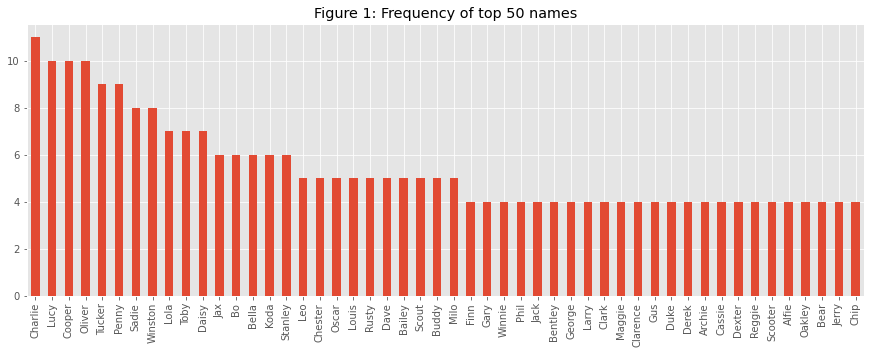

In [51]:
plt.figure(figsize = (15,5))
df_clean['name'].value_counts()[:50].plot.bar()
plt.title('Figure 1: Frequency of top 50 names')
plt.savefig('insight_1.png')
plt.show();

### Insight 2:
<a id = '5.2'></a>
On average dogs at stage puppo and doggo have more favorite counts. However, they are also less represented in the data compared to puppers.

In [53]:
df_clean.groupby('dog_stage')['favorite_count'].describe().sort_values(['50%'], 
                                                                       ascending = False).round(2).reset_index()

dog_stage  count      mean       std      min      25%      50%  \
0    doggo-puppo    1.0  47844.00       NaN  47844.0  47844.0  47844.0   
1  doggo-floofer    1.0  17169.00       NaN  17169.0  17169.0  17169.0   
2          puppo   22.0  21582.09  28034.34   3277.0   7043.5  13387.5   
3          doggo   63.0  19356.38  22208.48   2593.0   8268.0  12376.0   
4        floofer    7.0  13206.00  11258.32   2262.0   5045.5  11302.0   
5   doggo-pupper    9.0  12533.11  12216.21   4849.0   7039.0   8992.0   
6         pupper  203.0   7197.74  10703.79    693.0   2423.5   3226.0   

        75%       max  
0  47844.00   47844.0  
1  17169.00   17169.0  
2  19691.25  132810.0  
3  20502.50  131075.0  
4  17721.00   33345.0  
5  10342.00   44619.0  
6   7669.00  106827.0

### Insight 3:
<a id = '5.3'></a>
On average tweets posted during warm months (May - July) get more retweets and favorites.

In [55]:
df_clean['month'] = df_clean['timestamp'].dt.month

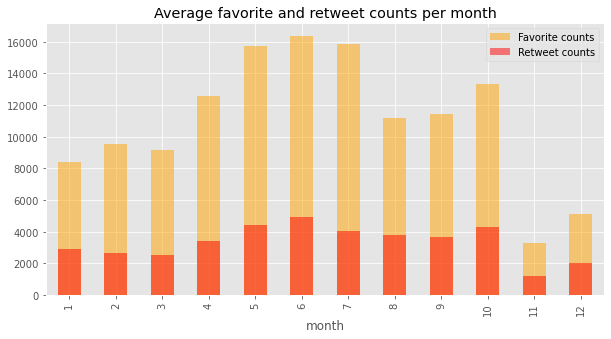

In [56]:
plt.figure(figsize = (10,5))
df_clean.groupby('month')['favorite_count'].mean().plot.bar(alpha = 0.5, label = 'Favorite counts', color = 'orange')
df_clean.groupby('month')['retweet_count'].mean().plot.bar(alpha = 0.5, label = 'Retweet counts', color = 'red')
plt.title('Average favorite and retweet counts per month')
plt.legend()
plt.savefig('insight_3.png')
plt.show();

### Additional Visualisation
<a id = '5.4'></a>
I am interested in relationship between favorite and retweet counts. Within scatter plot I will also plot a fitted line.

In [71]:
### Regression (fit) line within a scatter plot
d = np.polyfit(df_clean['favorite_count'],df_clean['retweet_count'],1)
f = np.poly1d(d)
predicted_retweet_count = f(df_clean['favorite_count']) ## Predicted retweet counts

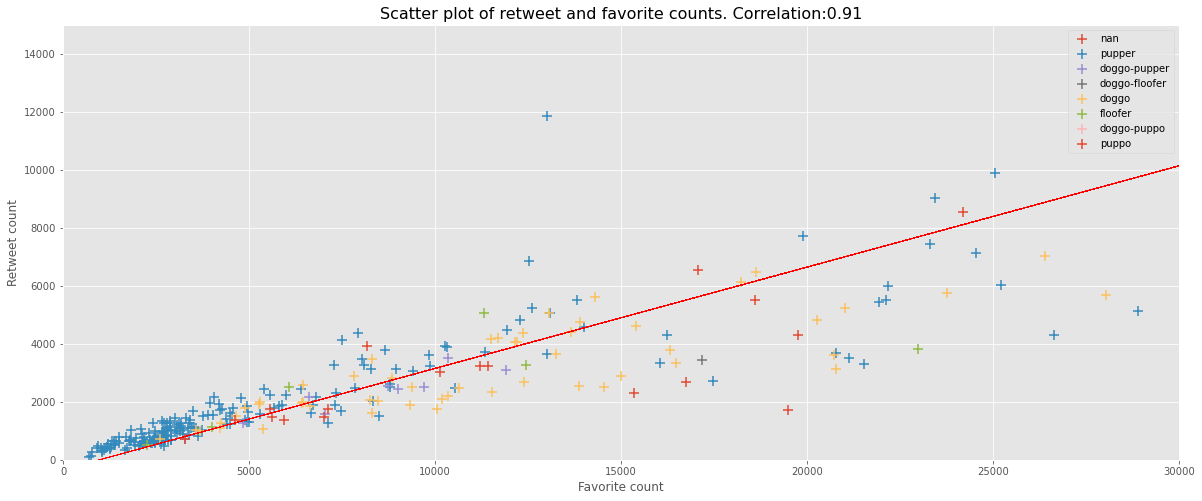

In [77]:
# Get unique names of dog type
types = list(set(df_clean['dog_stage']))

# Set the color map to match the number of dog types
z = range(1,len(types))
hot = plt.get_cmap('hot')

# Plot each dog type
x = df_clean['favorite_count']
y = df_clean['retweet_count']

plt.figure(figsize = (20,8))
corr = df_clean[['favorite_count','retweet_count']].corr().iloc[0,1].round(2) ## Correlation coefficient

for i in range(len(types)):
    indx = df_clean['dog_stage'] == types[i]
    plt.scatter(x[indx], y[indx], s=90,  label=types[i], cmap = types, marker = '+')
plt.plot(df_clean['favorite_count'], predicted_retweet_count, color='red', linewidth = 0.5, linestyle = '--')
plt.legend()
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
plt.title('Scatter plot of retweet and favorite counts. Correlation:{}'.format(corr), fontsize = 16)
plt.xlim([0, 30000])
plt.ylim([0, 15000])
plt.savefig('scatter.png')
plt.show();

From above scatter pplot we see that puppers are crowded in the lower favorites and retweet count section.

# Step 6: Reporting
<a id = '6'></a>
See for wrangle_report.pdf and act_report.pdf in compiled zip folder.

